In [1]:
%matplotlib inline
import pandas 
import seaborn
import matplotlib.pyplot as plt

In [40]:
def get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,treatment):
    raw_data = pandas.read_excel(path,header=0)
    
    time=[]
    for i in range(num_time_points):
        time = time + [read_time_step*i]*num_area_labels
    raw_data['time'] = time
    raw_data['genotype'] = g*(len(raw_data)/num_area_labels)
    raw_data['area_label'] = range(1,(len(g)+1))*(len(raw_data)/num_area_labels)
    raw_data['treatment'] = treatment*(len(raw_data)/num_area_labels)

    return raw_data

def plot_timecourses(data):
        
    g = seaborn.FacetGrid(data,aspect=2.5,size=4,col='genotype')
    g = g.map(seaborn.pointplot, 'time','Overall [cps]','treatment',palette='Blues').add_legend()
    
    return g

def plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()

    for i in range(num_time_points):
        for j in range(num_plant_lines):
            x=temp2[((normalization_observation_number-1)*num_plant_lines)+j]
            temp1[j+i*num_plant_lines] = float(temp1[j+i*num_plant_lines] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
    g2 = seaborn.FacetGrid(data_normalized,aspect=1,size=4)
    g2 = g2.map(seaborn.pointplot, 'time','Overall [cps]','genotype',palette='Blues').add_legend()
    
    return g2

def normalize_data_for_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()

    for i in range(num_time_points):
        for j in range(num_plant_lines):
            x=temp2[((normalization_observation_number-1)*num_plant_lines)+j]
            temp1[j+i*num_plant_lines] = float(temp1[j+i*num_plant_lines] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
#     time_subtraction = data_normalized['time'].iloc[(normalization_observation_number-1)]
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
#     data_normalized['time'] = [(x-time_subtraction) for x in data_normalized['time']]
    
    return data_normalized

def find_time_to_max_foldchange(data,start_time,end_time,num_plant_lines,time_before_treatment):
    
    data = data[(data['time']>(start_time-1))&(data['time']<(end_time+1))]
    num_time_points = len(data)/num_plant_lines
    time_max_fold_change = [0]*num_plant_lines
    max_fold_change = [0]*num_plant_lines
    
    for counter1 in range(num_plant_lines):
        compare_to = data['Overall [cps]'].iloc[counter1]
        for counter2 in range(num_time_points):
            if data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1] > compare_to:
                time_max_fold_change[counter1] = data['time'].iloc[(num_plant_lines*counter2)+counter1]-time_before_treatment
                max_fold_change[counter1] = float(data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1])#/float(compare_to)
                compare_to = data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1]
    
    line_analysis = pandas.DataFrame({'genotype':data[data['time']==start_time]['genotype'],'treatment':data[data['time']==start_time]['treatment'],'line':data.area_label.unique(),'Time to Max Fold change':time_max_fold_change,'Max Fold change':max_fold_change})
    
    return line_analysis

def plot_line_analysis(line_analysis):
    
    line_analysis['Max percent change post induction'] = [(x-1)*100 for x in line_analysis['Max Fold change']]

    
    g1 = seaborn.FacetGrid(line_analysis,size=5,aspect=1)
    g1 = g1.map(seaborn.boxplot, 'treatment','Max percent change post induction',palette='Blues')
    g1 = g1.map(seaborn.swarmplot, 'treatment','Max percent change post induction','line',palette='YlOrRd')
    plt.suptitle('Max percent change post induction')
    
    g2 = seaborn.FacetGrid(line_analysis[line_analysis['treatment']=='Damage'],size=5,aspect=1)
    g2 = g2.map(seaborn.boxplot, 'treatment','Time to Max Fold change',palette='Blues')
    g2 = g2.map(seaborn.swarmplot, 'treatment','Time to Max Fold change','line',palette='YlOrRd')
    plt.suptitle('Time to Max Change')
    
    return g1,g2
    

# Plotting high res damage

In [5]:
#getting data from first damage assay

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170612_PHD5_highres_damage.xlsx'
num_area_labels = 12
read_time_step = 10
num_time_points = 40
g = ['4040_1']*2 + ['4040_2']*2 + ['4040_3']*2 + ['4038_1']*2 + ['4038_2']*2 + ['4039_1']*2
treatment = ['Damage','Control']*6
data = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,treatment)


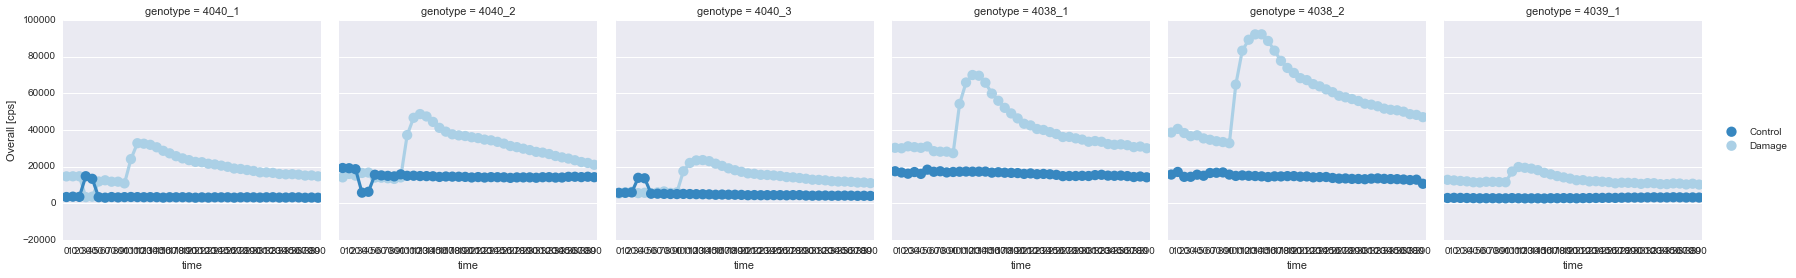

In [8]:
plot_timecourses(data)

In [35]:

normalization_observation_number = 10
num_plant_lines = 12
num_time_points = 40
start_time = 60
end_time =  300
time_before_treatment = 90

PHD5 = normalize_data_for_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)
PHD5_analysis = find_time_to_max_foldchange(data,start_time,end_time,num_plant_lines,time_before_treatment)


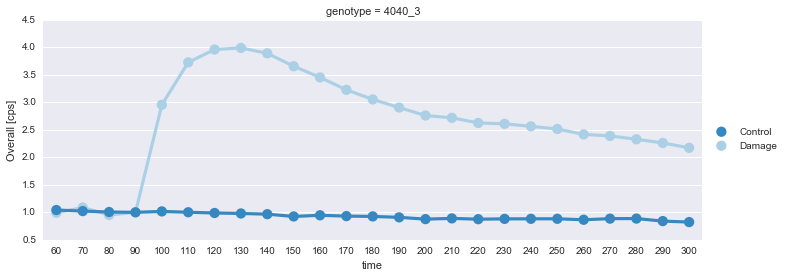

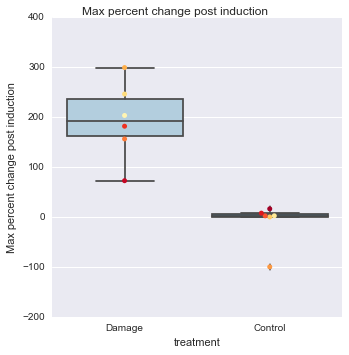

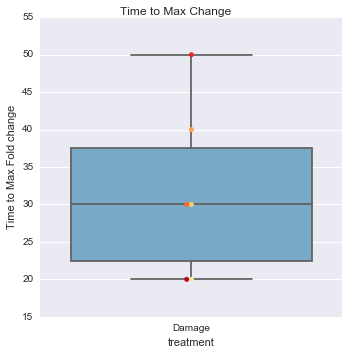

In [42]:
plot_timecourses(PHD5[PHD5['genotype']=='4040_3'])
plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170615_JDCTF_Highres_Damage_Timecourse.svg')
g1,g2 = plot_line_analysis(PHD5_analysis)
g1.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170615_JDCTF_Highres_Damage_Timecourse_Max_percent_change.svg')
g2.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170615_JDCTF_Highres_Damage_Timecourse_Time_to_max_percet_change.svg')


# Analyzing repeated damage assay

In [62]:
#getting data from first damage assay

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170615_PHD5_dbldmg_equal_box_area.xlsx'
# path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170615_PHD5_dbldmg_full_trace.xlsx'

num_area_labels = 12
read_time_step = 10
num_time_points = 72
g = ['4040_1']*2 + ['4040_2']*2 + ['4038_1']*2 + ['4039_1']*2 + ['4039_2']*2 + ['4039_3']*2
treatment = ['Damage','Control']*6
data = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,treatment)


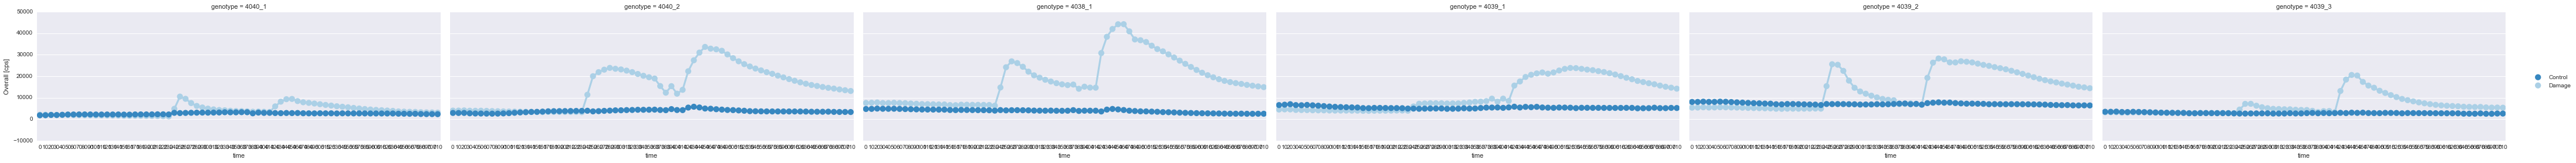

In [63]:
plot_timecourses(data)

In [64]:
normalization_observation_number = 24
num_plant_lines = 12
num_time_points = 72
start_time = 200
end_time =  900
time_before_treatment = 230

PHD5 = normalize_data_for_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time)


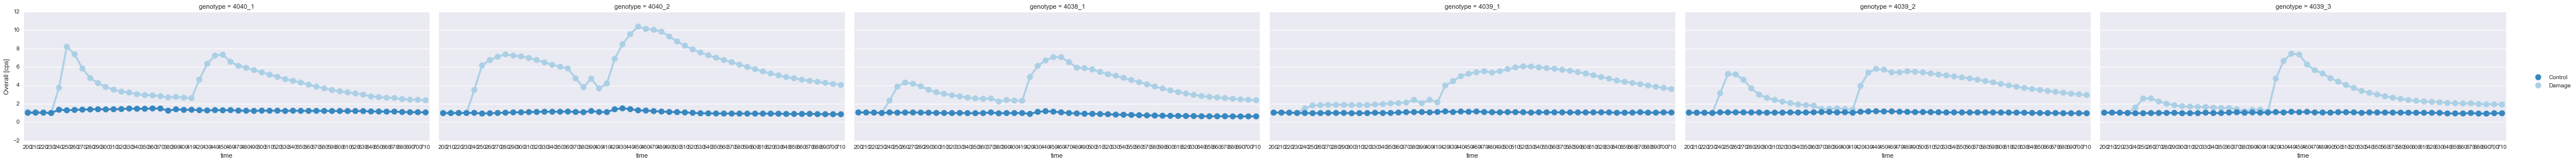

In [65]:
plot_timecourses(PHD5)
